#📖 **Biblioteca**

In [ ]:
#importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.ticker import MultipleLocator





## 📌**Extração**

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"


In [ ]:
#baixando os dados de arquivo formato json
telecomx = pd.read_json(url)
print(telecomx)

      customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'Phone

In [ ]:
  telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##🛠**Transformação**

In [ ]:
#normalizando e desaninhando os dados da colunas
telecomx = pd.json_normalize(telecomx.to_dict(orient = "records"))

telecomx.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [ ]:
telecomx.tail()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [ ]:
#obtendo informaçoes do DataFrame
telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
#verifique se há valores únicos em cada coluna
for col in telecomx.columns:
  print(f"valores únicos na coluna '{col}': {telecomx[col].nunique()}")
  if telecomx[col].nunique() < 50: # imprimindo apenas se houver menos de 50 valores unicos
    print(telecomx[col].unique())
    print("-" * 50)

valores únicos na coluna 'customerID': 7267
valores únicos na coluna 'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos na coluna 'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos na coluna 'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos na coluna 'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos na coluna 'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos na coluna 'customer.tenure': 73
valores únicos na coluna 'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos na coluna 'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos na coluna 'internet.InternetService': 3
['DSL' 'Fiber optic' 'No']
----------------------------

In [ ]:
#Verificando se há valores nulos
telecomx.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
#Verificando se a dados duplicados
telecomx.duplicated().sum()

np.int64(0)

In [ ]:
#analisando as estatistica descritivas basicas dos dados
telecomx.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [ ]:
#Verificando as colunas com espaço em brancos
espacos_em_branco = telecomx.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(espacos_em_branco[espacos_em_branco > 0])


Churn                    224
account.Charges.Total     11
dtype: int64


In [ ]:
#Transformando a coluna account.Charges.Total em coluna em tipo float
telecomx["account.Charges.Total"] = pd.to_numeric(telecomx["account.Charges.Total"], errors = "coerce")

#Tratando a coluna churn, substituindo os espaços em brancos por nan
telecomx["Churn"] = telecomx["Churn"].replace(r'^\s*$',np.nan, regex= True)

telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
telecomx.isnull().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
telecomx = telecomx.rename(columns ={"customerID": "ID_cliente", "customer.gender" : "Genero",
                          "customer.SeniorCitizen": "Idoso", "customer.Partner": "Possui_parceiro",
                          "customer.Dependents": "Possui_dependentes", "customer.tenure": "Meses_contrato",
                          "phone.PhoneService": "Servico_telefonico", "phone.MultipleLines": "Multiplas_linhas",
                          "internet.InternetService": "Internet", "internet.OnlineSecurity": "Seguranca_online",
                          "internet.OnlineBackup": "backup_online", "internet.DeviceProtection": "Protecao_dispositivo",
                          "internet.TechSupport": "suporte_tecnico_adcional", "internet.StreamingTV": "Streaming_TV",
                          "internet.StreamingMovies": "Streaming_filmes", "account.Contract": "Contrato",
                          "account.PaperlessBilling": "fatura_digital", "account.PaymentMethod": "Forma_pagamento",
                          "account.Charges.Monthly": "Valor_mensal", "account.Charges.Total": "Total_pago"})

In [ ]:
#criando coluna e calculando os gastos diario
telecomx["Gasto_diario"] = ((telecomx["Total_pago"] / telecomx["Meses_contrato"]) /30).round(2)

#inserindo a coluna na posição especifica
telecomx.insert(19, "Gasto_diario", telecomx.pop("Gasto_diario"))

In [ ]:
#tratando dos valor NAN, removendo da base de dados.
telecomx = telecomx.dropna()

telecomx.isnull().sum()

,0
ID_cliente,0
Churn,0
Genero,0
Idoso,0
Possui_parceiro,0
Possui_dependentes,0
Meses_contrato,0
Servico_telefonico,0
Multiplas_linhas,0
Internet,0


In [ ]:
telecomx["Multiplas_linhas"].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [ ]:
#Verificando  a coluna Multiplas_linhas com  "No phone service"
telecomx[(telecomx["Multiplas_linhas"] == "No phone service")]

,ID_cliente,Churn,Genero,Idoso,Possui_parceiro,Possui_dependentes,Meses_contrato,Servico_telefonico,Multiplas_linhas,Internet,...,Protecao_dispositivo,suporte_tecnico_adcional,Streaming_TV,Streaming_filmes,Contrato,fatura_digital,Forma_pagamento,Gasto_diario,Valor_mensal,Total_pago
10,0017-DINOC,No,Male,0,No,No,54,No,No phone service,DSL,...,No,Yes,Yes,No,Two year,No,Credit card (automatic),1.52,45.20,2460.55
14,0019-GFNTW,No,Female,0,No,No,56,No,No phone service,DSL,...,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),1.52,45.05,2560.10
16,0020-JDNXP,No,Female,0,Yes,Yes,34,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,1.95,61.25,1993.20
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.84,25.10,25.10
25,0032-PGELS,Yes,Female,0,Yes,Yes,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),1.02,30.50,30.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,9906-NHHVC,No,Female,1,No,No,65,No,No phone service,DSL,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),1.80,53.50,3517.90
7201,9907-SWKKF,Yes,Female,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,0.84,25.05,25.05
7218,9928-BZVLZ,No,Female,0,No,No,12,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,1.53,49.85,552.10
7238,9955-QOPOY,No,Male,0,Yes,No,69,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),2.06,60.80,4263.40


##📈📊**Carga e Análise**

In [ ]:
churn_percentual = telecomx["Churn"].value_counts(normalize = True)* 100
genero_counts = telecomx["Genero"].value_counts()
idoso_counts = telecomx["Idoso"].value_counts()
dependentes_counts = telecomx["Possui_dependentes"].value_counts()

fig = make_subplots(
    rows=2, cols = 2,
    specs=[[{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
    subplot_titles= ["Distribuição por Churn",
                     "Distribuição por Genêro",
                     "Distribuição por Senioridade",
                     "Distribuição  por Dependentes"],
    horizontal_spacing=0.1,
    vertical_spacing=0.2
)

fig.add_trace(go.Pie(labels = churn_percentual.index.map({"Yes":"Churn", "No": "Não Churn"}),
                     values = churn_percentual.values, name = "Churn",
                     textinfo ="label + percent" ,
                     marker=dict(colors = ["#1f77b4", "#ff7f0e"])),row =1, col = 1)

fig.add_trace(go.Pie(labels = genero_counts.index,
                     values = genero_counts.values,
                     name = "Genêro", textinfo = "label + percent",
                    marker=dict(colors = ["#0000FF","#FF0000"])), row = 1, col=2)

fig.add_trace(go.Pie(labels = idoso_counts.index.map({0:"Não Senior", 1: "Senior"}),
                     values = idoso_counts.values,
                     name = "Senioridade" ,
                     textinfo = "label + percent",
                     marker=dict(colors =["#0000FF","FF0000"])),row =2, col = 1)

fig.add_trace(go.Pie(labels = dependentes_counts.index.map({"Yes": "Com Dependentes", "No": "Sem Dependentes"}),
                     values= dependentes_counts.values,
                     name = "Dependentes",
                     textinfo = "label + percent",
                     marker=dict(colors= ["#1f77b4", "#ff7f0e"])), row = 2, col = 2)


fig.update_layout(
    title_text = "Distribuição de Clientes",
    height = 990,
    width = 1000,
    font=dict(size = 18),

    showlegend=False


)



In [ ]:
#calculando  o total de churn entre idoso e não idoso
contagem = telecomx.groupby("Churn")["Idoso"].value_counts().rename("Contagem")

#calculando o percentual de churn entre idoso e nao idoso
cont_percentual = telecomx.groupby("Churn")["Idoso"].value_counts(normalize = True).mul(100).round(2).rename("Percentual")

tabela = pd.concat([contagem, cont_percentual], axis = 1)

tabela = tabela.reset_index()

tabela["Idoso"] = tabela["Idoso"].map({0: "No senior", 1: "Senior"})

print(tabela)

  Churn      Idoso  Contagem  Percentual
0    No  No senior      4497       87.10
1    No     Senior       666       12.90
2   Yes  No senior      1393       74.53
3   Yes     Senior       476       25.47


In [ ]:
sexo =telecomx.groupby("Churn")["Genero"].value_counts().rename("num.absoluto")

sexo_perc = telecomx.groupby("Churn")["Genero"].value_counts(normalize = True).mul(100).round(2).rename("Percentual")

genero = pd.concat([sexo, sexo_perc], axis =1).reset_index()


genero

,Churn,Genero,num.absoluto,Percentual
0,No,Male,2619,50.73
1,No,Female,2544,49.27
2,Yes,Female,939,50.24
3,Yes,Male,930,49.76


In [ ]:
dependentes =telecomx.groupby("Churn")["Possui_dependentes"].value_counts().rename("num.absoluto")

dependentes_perc = telecomx.groupby("Churn")["Possui_dependentes"].value_counts(normalize = True).mul(100).round(2).rename("Percentual")

tabela_dependentes = pd.concat([dependentes, dependentes_perc], axis =1).reset_index()


tabela_dependentes

,Churn,Possui_dependentes,num.absoluto,Percentual
0,No,No,3390,65.66
1,No,Yes,1773,34.34
2,Yes,No,1543,82.56
3,Yes,Yes,326,17.44


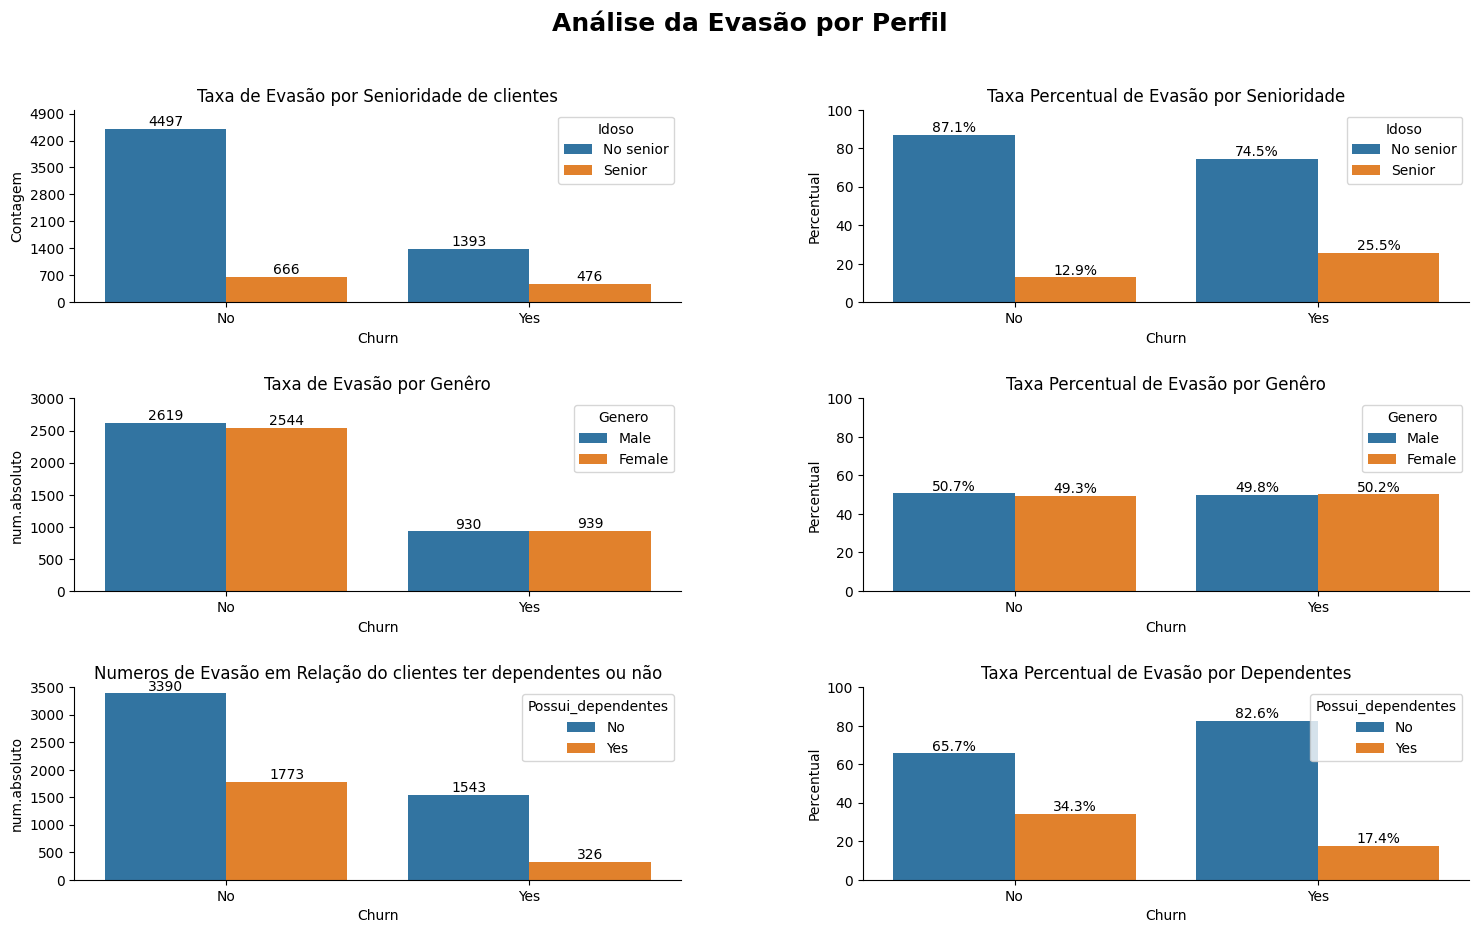

In [ ]:
fig,axs = plt.subplots(3,2, figsize = (18,10))
fig.subplots_adjust(hspace = 0.5,wspace = 0.3)
fig.suptitle("Análise da Evasão por Perfil", fontsize = 18, fontweight = "bold")


sns.barplot(data = tabela, x= "Churn",y = "Contagem",  hue = "Idoso", ax = axs[0,0])
axs[0,0].set_title("Taxa de Evasão por Senioridade de clientes")

axs[0,0].yaxis.set_major_locator(plt.MultipleLocator(700))
axs[0,0].set_ylim(0,5000)

sns.barplot(data = tabela, x = "Churn", y = "Percentual", hue = "Idoso", ax = axs[0,1])
axs[0,1].set_title("Taxa Percentual de Evasão por Senioridade")
axs[0,1].set_ylim(0,100)


sns.barplot(data = genero, x= "Churn",y= "num.absoluto" ,hue = "Genero", ax = axs[1,0])
axs[1,0].set_title("Taxa de Evasão por Genêro")
axs[1,0].set_ylim(0,3000)

sns.barplot(data = genero, x = "Churn", y = "Percentual", hue = "Genero", ax = axs[1,1])
axs[1,1].set_title("Taxa Percentual de Evasão por Genêro")
axs[1,1].set_ylim(0,100)

sns.barplot(data = tabela_dependentes, x = "Churn", y = "num.absoluto", hue = "Possui_dependentes", ax = axs[2,0])
axs[2,0].set_title("Numeros de Evasão em Relação do clientes ter dependentes ou não")
axs[2,0].set_ylim(0,3500)
axs[2,0].yaxis.set_major_locator(MultipleLocator(500))

sns.barplot(data = tabela_dependentes, x = "Churn", y = "Percentual", hue = "Possui_dependentes", ax = axs[2,1])
axs[2,1].set_title("Taxa Percentual de Evasão por Dependentes")
axs[2,1].set_ylim(0,100)


#Usando o for para rotular todos os rotulos
for row in axs:
  for ax in row:
    ax.spines[["top", "right"]].set_visible(False)#Removendo  as linhas de cima e da direita de todos os graficos

    for container in ax.containers:
      #especificando o rotulo de porcentagem
      if ax  in (axs[0,1], axs[1,1], axs[2,1]):
        ax.bar_label(container, fmt = "%.1f%%", label_type = "edge")
      else:
        ax.bar_label(container, fmt= "%.0f", label_type= "edge")


plt.show()

In [ ]:
perfil_demografico= telecomx.groupby(["Churn", "Genero", "Possui_dependentes"]).size().rename("Quantidade").reset_index()
print(perfil_demografico)

  Churn  Genero Possui_dependentes  Quantidade
0    No  Female                 No        1686
1    No  Female                Yes         858
2    No    Male                 No        1704
3    No    Male                Yes         915
4   Yes  Female                 No         774
5   Yes  Female                Yes         165
6   Yes    Male                 No         769
7   Yes    Male                Yes         161


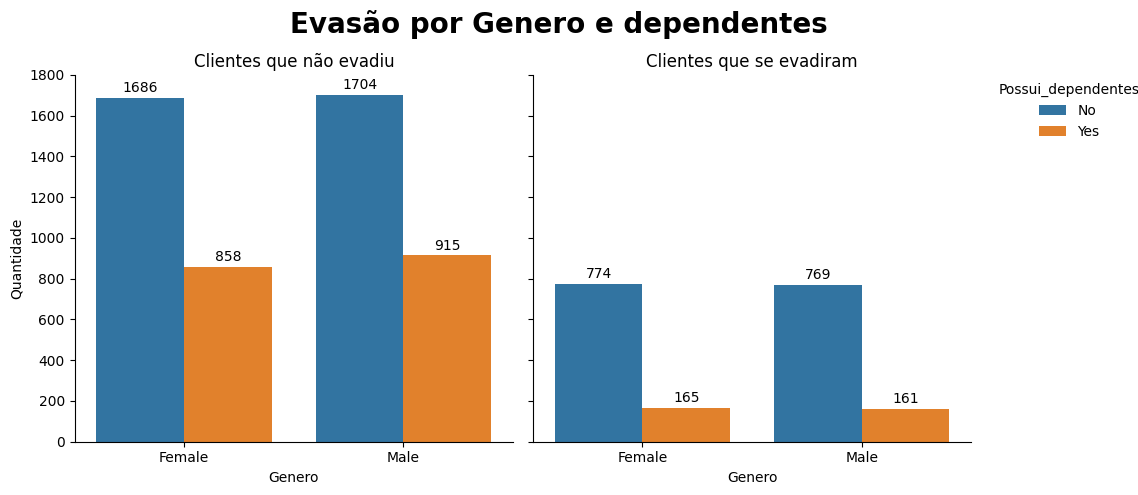

In [ ]:
g = sns.catplot(
    data = perfil_demografico,
    x = "Genero",
    y = "Quantidade",
    hue = "Possui_dependentes",
    col = "Churn",
    kind = "bar",
    height= 5, # definindo a altura em polegada
    aspect = 1  # definindo a razao altura/largura
)

g.fig.suptitle("Evasão por Genero e dependentes", fontsize = 20, fontweight = "bold")
g.fig.subplots_adjust(top = 0.85)
g._legend.set_bbox_to_anchor((1, 0.85))
g._legend.set_loc("upper right")


titulos ={"No": "Clientes que não evadiu", "Yes": "Clientes que se evadiram"}

for ax in g.axes.flat:
  texto = ax.get_title().split("=")[-1].strip()
  ax.set_title(titulos[texto])
  ax.set_ylim(0,1800)
  for container in ax.containers:
    ax.bar_label(container, fmt= "%.0f",label_type = "edge", padding = 2)



In [ ]:
media =telecomx.groupby("Churn")[["Valor_mensal", "Total_pago","Meses_contrato"]].mean().round(2)
print(media)

       Valor_mensal  Total_pago  Meses_contrato
Churn                                          
No            61.31     2555.34           37.65
Yes           74.44     1531.80           17.98


In [ ]:
fig = px.scatter(
    data_frame = telecomx,
    title = "Relação do tempo de contrato e valores pago mensalmente para evasão",
    x = "Meses_contrato",
    y = "Valor_mensal",
    color = "Churn",
    symbol = "Genero",
    size= "Total_pago"
)

fig.update_layout(
    legend = dict(
        title="Legenda",
        x = 1.05
    )
)
fig.show()

In [ ]:
contrato = telecomx.groupby("Contrato")["Contrato"].value_counts()
print(contrato)

Contrato
Month-to-month    3875
One year          1472
Two year          1685
Name: count, dtype: int64


In [ ]:
fig = px.histogram(contrato,
                   x = contrato.index,
                   y = contrato.values,
                   text_auto = True)
fig.show()

In [ ]:
fig =px.histogram(telecomx, x= "Meses_contrato", text_auto = True, color = "Churn", barmode = "group")
fig.update_layout(title = {"text":"Distribuição do Churn por tempo de contrato",
                           "x": 0.5, "font":{"size": 20}})

In [ ]:
telecomx.head()

,ID_cliente,Churn,Genero,Idoso,Possui_parceiro,Possui_dependentes,Meses_contrato,Servico_telefonico,Multiplas_linhas,Internet,...,Protecao_dispositivo,suporte_tecnico_adcional,Streaming_TV,Streaming_filmes,Contrato,fatura_digital,Forma_pagamento,Gasto_diario,Valor_mensal,Total_pago
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [ ]:
#usando a funçao crosstab para cruzar 2 variavel categoria e contar as mesma,
#o argumento margins é para trazer o total  ao dataframe
servico_telefonico = pd.crosstab(
    telecomx["Churn"],
    telecomx["Servico_telefonico"],
    margins = True,
    margins_name = "Total",)

print("Serviço Telefonico:\n")
print(servico_telefonico)


servico_telefonico_porc = (pd.crosstab(
    telecomx["Churn"],
    telecomx["Servico_telefonico"],
    margins = True,
    margins_name = "Total",
    normalize = "index")*100 ).round(2)

print("\nPorcentagem por evasão\n")
print(servico_telefonico_porc)


#Novamente usando o crosstab para cruzar 2 variaveis categoria, so que agora usando o argumento normalize,
# que serve para trazer a contagem em forma de porcentagens por item.
telefonico = (pd.crosstab(
    telecomx["Churn"],
    telecomx["Servico_telefonico"],
    normalize = True)* 100).round(2)

print("\nPorcentagem do serviço telefonico\n")
print(telefonico)

# usando a funçao crosstab com o argumento  normalize = "columns", que traz a porcentagem  por coluna.
telefonia = (pd.crosstab(
    telecomx["Churn"],
    telecomx["Servico_telefonico"],
    normalize = "columns")*100).round(2)

print("\n porcentagem de Churn em relação ao servico de telefone\n")
print(telefonia)



Serviço Telefonico:

Servico_telefonico   No   Yes  Total
Churn                               
No                  510  4653   5163
Yes                 170  1699   1869
Total               680  6352   7032

Porcentagem por evasão

Servico_telefonico    No    Yes
Churn                          
No                  9.88  90.12
Yes                 9.10  90.90
Total               9.67  90.33

Porcentagem do serviço telefonico

Servico_telefonico    No    Yes
Churn                          
No                  7.25  66.17
Yes                 2.42  24.16

 porcentagem de Churn em relação ao servico de telefone

Servico_telefonico    No    Yes
Churn                          
No                  75.0  73.25
Yes                 25.0  26.75


In [ ]:
serv_telefonico = pd.crosstab(
    telecomx["Churn"],
    telecomx["Servico_telefonico"])

In [ ]:
porc_servico_telefonico = (telecomx
                           .groupby("Churn")
                           ["Servico_telefonico"]
                           .value_counts(normalize = True)
                           .mul(100).round(2)
                           .rename('Percentual')
                           .reset_index())

porc_telefonico = (telecomx
                   .groupby(["Churn", "Servico_telefonico"])
                   .size()
                   .div(len(telecomx))
                   .mul(100)
                   .round(2)
                   .reset_index(name = "Percentual"))

porc_telefonia = (telecomx
                  .groupby("Servico_telefonico")
                  ["Churn"]
                  .value_counts(normalize =True)
                  .mul(100)
                  .round(2)
                  .rename("Percentual")
                  .reset_index()
)


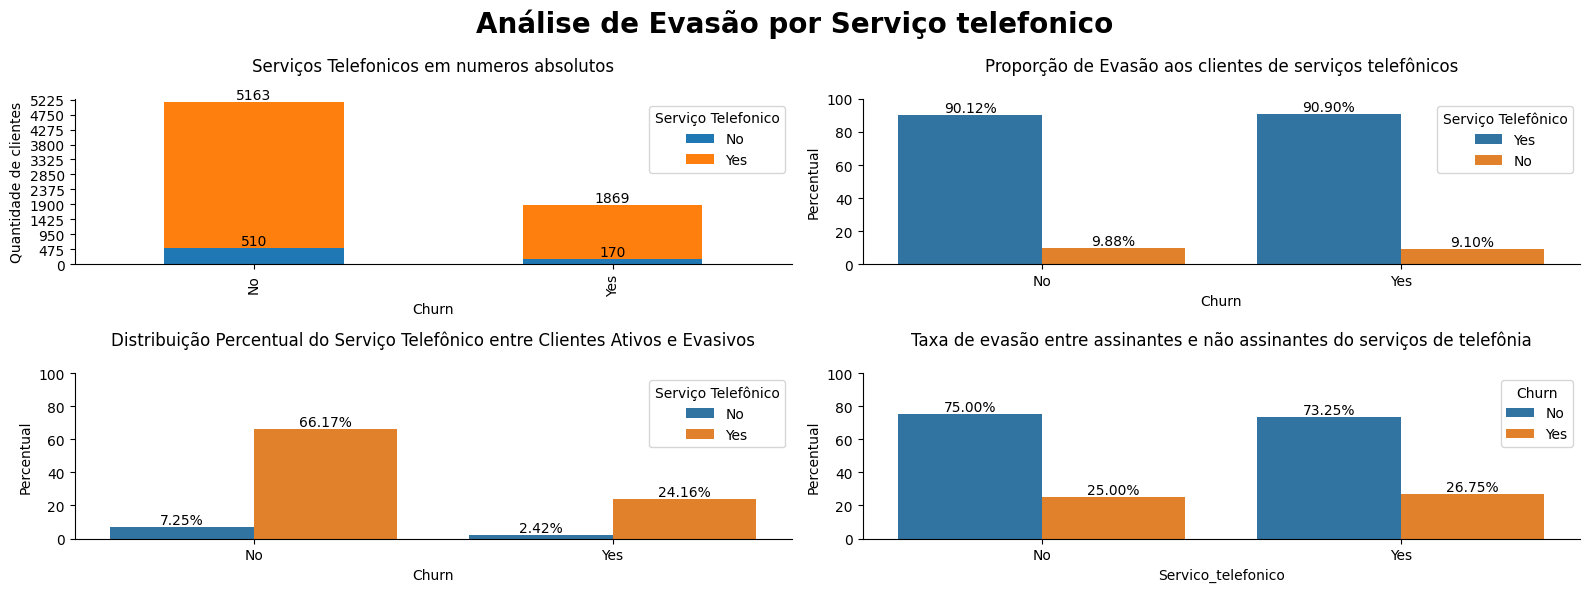

In [ ]:
fig1,axs1 = plt.subplots(2,2, figsize = (16,6))
fig1.subplots_adjust(hspace = 0.5, wspace = 0.3, top = 0.85)
fig1.suptitle("Análise de Evasão por Serviço telefonico", fontsize = 20,fontweight = "bold")


serv_telefonico.plot(
    kind = "bar",
    stacked= True,
    ax = axs1[0,0],

)
axs1[0,0].set_ylim(0,5250)
axs1[0,0].set_title("Serviços Telefonicos em numeros absolutos", pad = 20)# pad aumenta o espaço entre o grafico e o titulo
axs1[0,0].set_ylabel("Quantidade de clientes")
axs1[0,0].legend(title ="Serviço Telefonico")
axs1[0,0].yaxis.set_major_locator(MultipleLocator(475))

sns.barplot(
    data=porc_servico_telefonico,
    x="Churn",
    y="Percentual",
    hue="Servico_telefonico",
    ax=axs1[0,1]
)

axs1[0,1].set_title("Proporção de Evasão aos clientes de serviços telefônicos", pad = 20)
axs1[0,1].legend(title="Serviço Telefônico")

sns.barplot(
    data = porc_telefonico,
    x ="Churn",
    y= "Percentual",
    hue = "Servico_telefonico",
    ax = axs1[1,0]
)
axs1[1,0].set_title("Distribuição Percentual do Serviço Telefônico entre Clientes Ativos e Evasivos", pad = 20)
axs1[1,0].legend(title="Serviço Telefônico")

sns.barplot(
    data = porc_telefonia,
    x = "Servico_telefonico",
    y = "Percentual",
    hue = "Churn",
    ax= axs1[1,1]
)

axs1[1,1].set_title("Taxa de evasão entre assinantes e não assinantes do serviços de telefônia", pad = 20)

for row in axs1:
    for ax in row:
        ax.spines[["top","right"]].set_visible(False)
        for cont in ax.containers:
            try:

                if ax in (axs1[0,1],axs1[1,0], axs1[1,1]):
                    ax.bar_label(cont, fmt="%.2f%%", label_type="edge")
                    ax.set_ylim(0,100)
                else:
                    ax.bar_label(cont, fmt="%.0f", label_type="edge")
            except Exception:
                pass  # ignora se não for gráfico de barra

plt.tight_layout()
plt.show()

In [ ]:
internet = pd.crosstab(telecomx["Churn"],
            telecomx["Internet"],
            margins = True,
            margins_name= "Total")
print("\nServiço de Internet\n")
print(internet)

internet_porc = (pd.crosstab(
    telecomx["Churn"],
    telecomx["Internet"],
    margins = True,
    margins_name = "Total",
    normalize = "index") * 100).round(2)

print("\nProporção de Serviço de Internet\n")
print(internet_porc)
print("OBS1: A tabela leva em consideraçao a taxa por evasão\n ")
print("OBS2: A coluna total é  uma media ponderada em base no tamanho da amostra\n")

proporcao_por_tipo_de_internet = (pd.crosstab(
    telecomx["Churn"],
    telecomx["Internet"],
    normalize = True) * 100
).round(2)

print("\n proporçao de assinantes para cada tipo de Serviço de Internet\n")
print(proporcao_por_tipo_de_internet)

servico_internet = (pd.crosstab(
    telecomx["Churn"],
    telecomx["Internet"],
    normalize = "columns")*100

).round(2)

print("\nPorporção da taxa de evasão, por tipo de conexação de internet\n")
print(servico_internet)


Serviço de Internet

Internet   DSL  Fiber optic    No  Total
Churn                                   
No        1957         1799  1407   5163
Yes        459         1297   113   1869
Total     2416         3096  1520   7032

Proporção de Serviço de Internet

Internet    DSL  Fiber optic     No
Churn                              
No        37.90        34.84  27.25
Yes       24.56        69.40   6.05
Total     34.36        44.03  21.62
OBS1: A tabela leva em consideraçao a taxa por evasão
 
OBS2: A coluna total é  uma media ponderada em base no tamanho da amostra


 proporçao de assinantes para cada tipo de Serviço de Internet

Internet    DSL  Fiber optic     No
Churn                              
No        27.83        25.58  20.01
Yes        6.53        18.44   1.61

Porporção da taxa de evasão, por tipo de conexação de internet

Internet   DSL  Fiber optic     No
Churn                             
No        81.0        58.11  92.57
Yes       19.0        41.89   7.43


In [ ]:
graf_internet = telecomx.groupby("Churn")["Internet"].value_counts().reset_index(name = "NºClientes")

graf_proporcao_internet = (telecomx.groupby("Churn")
                          ["Internet"]
                           .value_counts(normalize = True)
                           .mul(100)
                           .round(2)
                           .rename("Percentual")
                           .reset_index()
)

graf_proporcao_tipo_internet = (
    telecomx.groupby(["Churn", "Internet"])
    .size()
    .div(len(telecomx))
    . mul(100)
    .round(2)
    .rename("Percentual")
    .reset_index()
)

graf_evasao_por_conexao = (
    telecomx
    .groupby("Internet")
    ["Churn"]
    .value_counts(normalize = True)
    .mul(100)
    .round(2)
    .rename("Percentual")
    .reset_index()
)



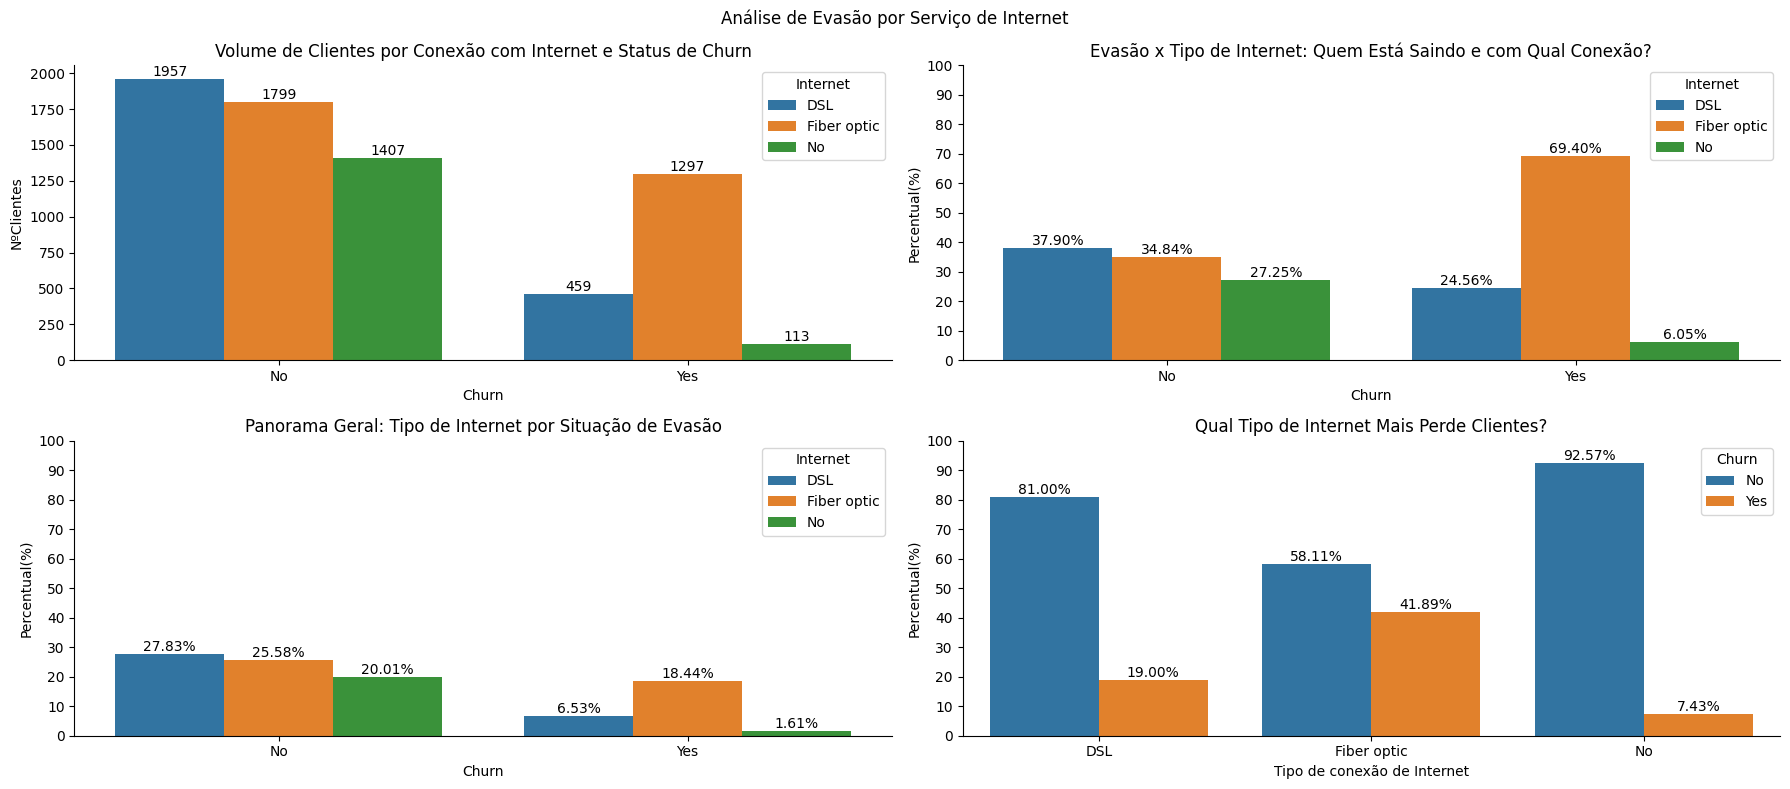

In [ ]:
fig2,axs2 = plt.subplots(2,2, figsize  =(18,8))
fig2.subplots_adjust(hspace = 1,wspace =1)
fig2.suptitle("Análise de Evasão por Serviço de Internet")

sns.barplot(data =graf_internet, x = "Churn", y = "NºClientes", hue = "Internet",ax =axs2[0,0])
axs2[0,0].set_title("Volume de Clientes por Conexão com Internet e Status de Churn")
axs2[0,0].spines["top"].set_visible(False)
axs2[0,0].spines["right"].set_visible(False)

sns.barplot(data = graf_proporcao_internet, x = "Churn", y = "Percentual", hue = "Internet", ax = axs2[0,1] )
axs2[0,1].set_title("Evasão x Tipo de Internet: Quem Está Saindo e com Qual Conexão?")
axs2[0,1].set_ylim(0,100)
axs2[0,1].set_ylabel("Percentual(%)")
axs2[0,1].yaxis.set_major_locator(MultipleLocator(10))
axs2[0,1].spines["top"].set_visible(False)
axs2[0,1].spines["right"].set_visible(False)

sns.barplot(data = graf_proporcao_tipo_internet, x = "Churn", y = "Percentual", hue = "Internet",ax = axs2[1,0] )
axs2[1,0].set_title("Panorama Geral: Tipo de Internet por Situação de Evasão")
axs2[1,0].set_ylim(0,100)
axs2[1,0].set_ylabel("Percentual(%)")
axs2[1,0].yaxis.set_major_locator(MultipleLocator(10))
axs2[1,0].spines["top"].set_visible(False)
axs2[1,0].spines["right"].set_visible(False)

sns.barplot(data = graf_evasao_por_conexao, x = "Internet", y = "Percentual", hue = "Churn", ax = axs2[1,1])
axs2[1,1].set_title("Qual Tipo de Internet Mais Perde Clientes?")
axs2[1,1].set_ylim(0,100)
axs2[1,1].set_xlabel("Tipo de conexão de Internet")
axs2[1,1].set_ylabel("Percentual(%)")
axs2[1,1].yaxis.set_major_locator( MultipleLocator(10))
axs2[1,1].spines["top"].set_visible(False)
axs2[1,1].spines["right"].set_visible(False)


for row in axs2:
    for ax in row:
        for cont in ax.containers:
            try:

                if ax in (axs2[0,1],axs2[1,0], axs2[1,1]):
                    ax.bar_label(cont, fmt="%.2f%%", label_type="edge")
                else:
                    ax.bar_label(cont, fmt="%.0f", label_type="edge")
            except Exception:
                pass  # ignora se não for gráfico de barra

plt.tight_layout()
plt.show()

In [ ]:
telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_cliente                7032 non-null   object 
 1   Churn                     7032 non-null   object 
 2   Genero                    7032 non-null   object 
 3   Idoso                     7032 non-null   int64  
 4   Possui_parceiro           7032 non-null   object 
 5   Possui_dependentes        7032 non-null   object 
 6   Meses_contrato            7032 non-null   int64  
 7   Servico_telefonico        7032 non-null   object 
 8   Multiplas_linhas          7032 non-null   object 
 9   Internet                  7032 non-null   object 
 10  Seguranca_online          7032 non-null   object 
 11  backup_online             7032 non-null   object 
 12  Protecao_dispositivo      7032 non-null   object 
 13  suporte_tecnico_adcional  7032 non-null   object 
 14  Streaming_TV 

In [ ]:
servicos = telecomx.groupby(["Internet", "Servico_telefonico","Streaming_TV","Streaming_filmes"])[["Valor_mensal", "Total_pago","Meses_contrato"]].mean().round().reset_index()
display(servicos)

,Internet,Servico_telefonico,Streaming_TV,Streaming_filmes,Valor_mensal,Total_pago,Meses_contrato
0,DSL,No,No,No,32.0,786.0,22.0
1,DSL,No,No,Yes,44.0,1478.0,32.0
2,DSL,No,Yes,No,44.0,1562.0,34.0
3,DSL,No,Yes,Yes,55.0,2553.0,45.0
4,DSL,Yes,No,No,54.0,1337.0,23.0
5,DSL,Yes,No,Yes,68.0,2598.0,37.0
6,DSL,Yes,Yes,No,67.0,2528.0,36.0
7,DSL,Yes,Yes,Yes,81.0,4074.0,49.0
8,Fiber optic,Yes,No,No,77.0,1698.0,21.0
9,Fiber optic,Yes,No,Yes,89.0,2753.0,30.0


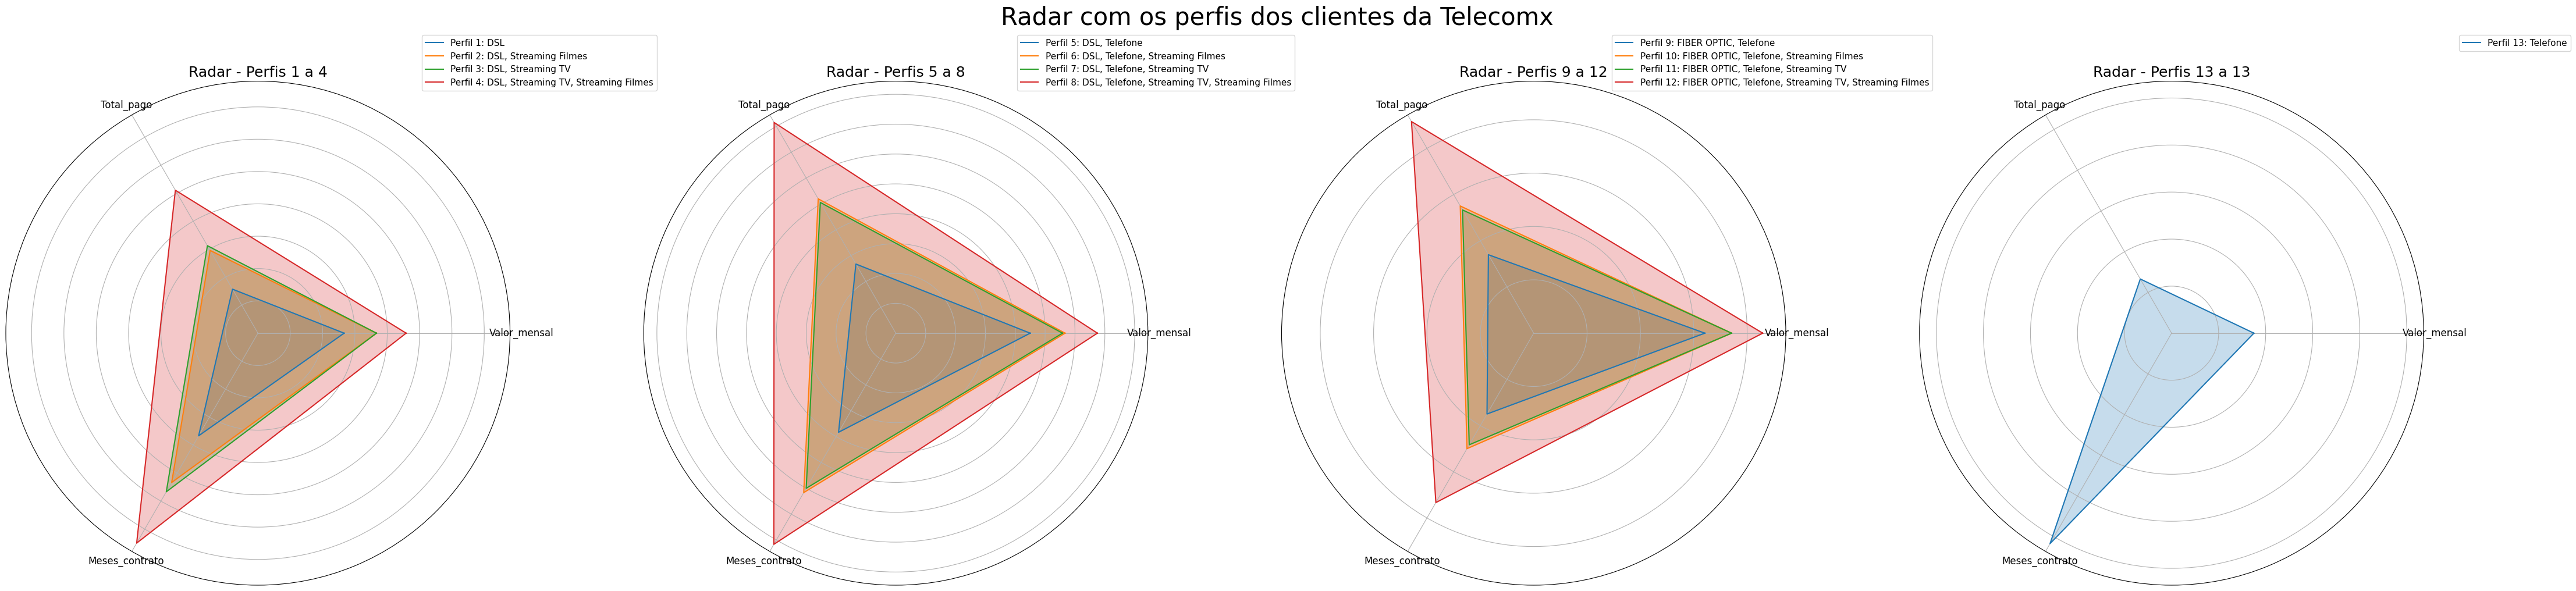

In [ ]:

# Padronizar para evitar erro de string
servicos["Internet"] = servicos["Internet"].str.lower()
servicos["Servico_telefonico"] = servicos["Servico_telefonico"].str.lower()
servicos["Streaming_TV"] = servicos["Streaming_TV"].str.lower()
servicos["Streaming_filmes"] = servicos["Streaming_filmes"].str.lower()

combinacoes = [
    {"Internet": "dsl", "Servico_telefonico": "no", "Streaming_TV": "no", "Streaming_filmes": "no"},
    {"Internet": "dsl", "Servico_telefonico": "no", "Streaming_TV": "no", "Streaming_filmes": "yes"},
    {"Internet": "dsl", "Servico_telefonico": "no", "Streaming_TV": "yes", "Streaming_filmes": "no"},
    {"Internet": "dsl", "Servico_telefonico": "no", "Streaming_TV": "yes", "Streaming_filmes": "yes"},
    {"Internet": "dsl", "Servico_telefonico": "yes", "Streaming_TV": "no", "Streaming_filmes": "no"},
    {"Internet": "dsl", "Servico_telefonico": "yes", "Streaming_TV": "no", "Streaming_filmes": "yes"},
    {"Internet": "dsl", "Servico_telefonico": "yes", "Streaming_TV": "yes", "Streaming_filmes": "no"},
    {"Internet": "dsl", "Servico_telefonico": "yes", "Streaming_TV": "yes", "Streaming_filmes": "yes"},
    {"Internet": "fiber optic", "Servico_telefonico": "yes", "Streaming_TV": "no", "Streaming_filmes": "no"},
    {"Internet": "fiber optic", "Servico_telefonico": "yes", "Streaming_TV": "no", "Streaming_filmes": "yes"},
    {"Internet": "fiber optic", "Servico_telefonico": "yes", "Streaming_TV": "yes", "Streaming_filmes": "no"},
    {"Internet": "fiber optic", "Servico_telefonico": "yes", "Streaming_TV": "yes", "Streaming_filmes": "yes"},
    {"Internet": "no", "Servico_telefonico": "yes", "Streaming_TV": "no internet service", "Streaming_filmes": "no internet service"},
]

metricas = ["Valor_mensal", "Total_pago", "Meses_contrato"]
maximos = [120, 5000, 60]

valores_normalizados = []
legendas = []

for i, f in enumerate(combinacoes, start=1):
    cond = (
        (servicos["Internet"] == f["Internet"]) &
        (servicos["Servico_telefonico"] == f["Servico_telefonico"]) &
        (servicos["Streaming_TV"] == f["Streaming_TV"]) &
        (servicos["Streaming_filmes"] == f["Streaming_filmes"])
    )

    resultados = servicos.loc[cond]

    if resultados.empty:
        print(f"⚠️ Perfil {i} não encontrado. Pulando.")
        continue

    perfil = resultados.iloc[0]
    valores = [perfil[m] for m in metricas]
    normalizado = [v / m * 100 for v, m in zip(valores, maximos)]
    normalizado.append(normalizado[0])

    valores_normalizados.append(normalizado)
    descricao = []
    if f["Internet"] != "no":
      descricao.append(f["Internet"].upper())
    if f["Servico_telefonico"] == "yes":
      descricao.append("Telefone")
    if f["Streaming_TV"] == "yes":
      descricao.append("Streaming TV")
    if f["Streaming_filmes"] == "yes":
      descricao.append("Streaming Filmes")

    legendas.append(f"Perfil {i}: {', '.join(descricao)}")


# Gerar os ângulos
metricas_completa = metricas + [metricas[0]]
angulos = np.linspace(0, 2 * np.pi, len(metricas_completa)).tolist()

# Criar subplots lado a lado com 3 gráficos (até 4 perfis por radar)
n_graficos = int(np.ceil(len(valores_normalizados) / 4))
fig3, axs3 = plt.subplots(nrows=1, ncols=n_graficos, figsize=(11 * n_graficos, 11), subplot_kw=dict(polar=True))
fig3.suptitle("Radar com os perfis dos clientes da Telecomx", fontsize = 30)

if n_graficos == 1:
    axs3 = [axs3]  # garante que axs seja iterável

for g in range(n_graficos):
    ax = axs3[g]
    for j in range(g * 4, min((g + 1) * 4, len(valores_normalizados))):
        ax.plot(angulos, valores_normalizados[j], label=legendas[j])
        ax.fill(angulos, valores_normalizados[j], alpha=0.25)

    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(metricas, fontsize = 12)
    ax.set_yticklabels([])
    ax.set_title(f"Radar - Perfis {g*4+1} a {min((g+1)*4, len(valores_normalizados))}", size=18)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize = 11)

plt.tight_layout()
plt.show()


In [ ]:
perfil_cliente = (
    telecomx
    .groupby(["Churn", "Servico_telefonico", "Internet", "Streaming_TV", "Streaming_filmes"])
    .size()
    .rename("count")
    .reset_index()
)

perfil_cliente["Porcentagem"] = (
    perfil_cliente
    .groupby("Churn")["count"]
    .transform(lambda x: (x / x.sum()) * 100)
).round(2)

perfil_cliente = perfil_cliente.drop(columns="count")

# agora sim: filtra apenas churn = Yes
perfil_cliente_yes = perfil_cliente[perfil_cliente["Churn"] == "Yes"]

perfil_cliente_no = perfil_cliente[perfil_cliente["Churn"] == "No"]

print("Participação dos Serviços entre os Clientes que Churnaram\n")
display(perfil_cliente_yes.sort_values(by="Porcentagem", ascending=False))

print("\nParticipação dos Serviços entre os Cliente que não Churnaram\n")
display(perfil_cliente_no.sort_values(by= "Porcentagem", ascending = False))




Participação dos Serviços entre os Clientes que Churnaram



,Churn,Servico_telefonico,Internet,Streaming_TV,Streaming_filmes,Porcentagem
24,Yes,Yes,Fiber optic,Yes,Yes,26.38
21,Yes,Yes,Fiber optic,No,No,22.58
17,Yes,Yes,DSL,No,No,10.49
23,Yes,Yes,Fiber optic,Yes,No,10.38
22,Yes,Yes,Fiber optic,No,Yes,10.06
25,Yes,Yes,No,No internet service,No internet service,6.05
13,Yes,No,DSL,No,No,4.12
16,Yes,No,DSL,Yes,Yes,2.30
20,Yes,Yes,DSL,Yes,Yes,1.87
18,Yes,Yes,DSL,No,Yes,1.61



Participação dos Serviços entre os Cliente que não Churnaram



,Churn,Servico_telefonico,Internet,Streaming_TV,Streaming_filmes,Porcentagem
12,No,Yes,No,No internet service,No internet service,27.25
11,No,Yes,Fiber optic,Yes,Yes,15.82
4,No,Yes,DSL,No,No,11.95
8,No,Yes,Fiber optic,No,No,9.36
7,No,Yes,DSL,Yes,Yes,7.63
9,No,Yes,Fiber optic,No,Yes,4.90
10,No,Yes,Fiber optic,Yes,No,4.76
5,No,Yes,DSL,No,Yes,4.32
0,No,No,DSL,No,No,4.30
6,No,Yes,DSL,Yes,No,4.13


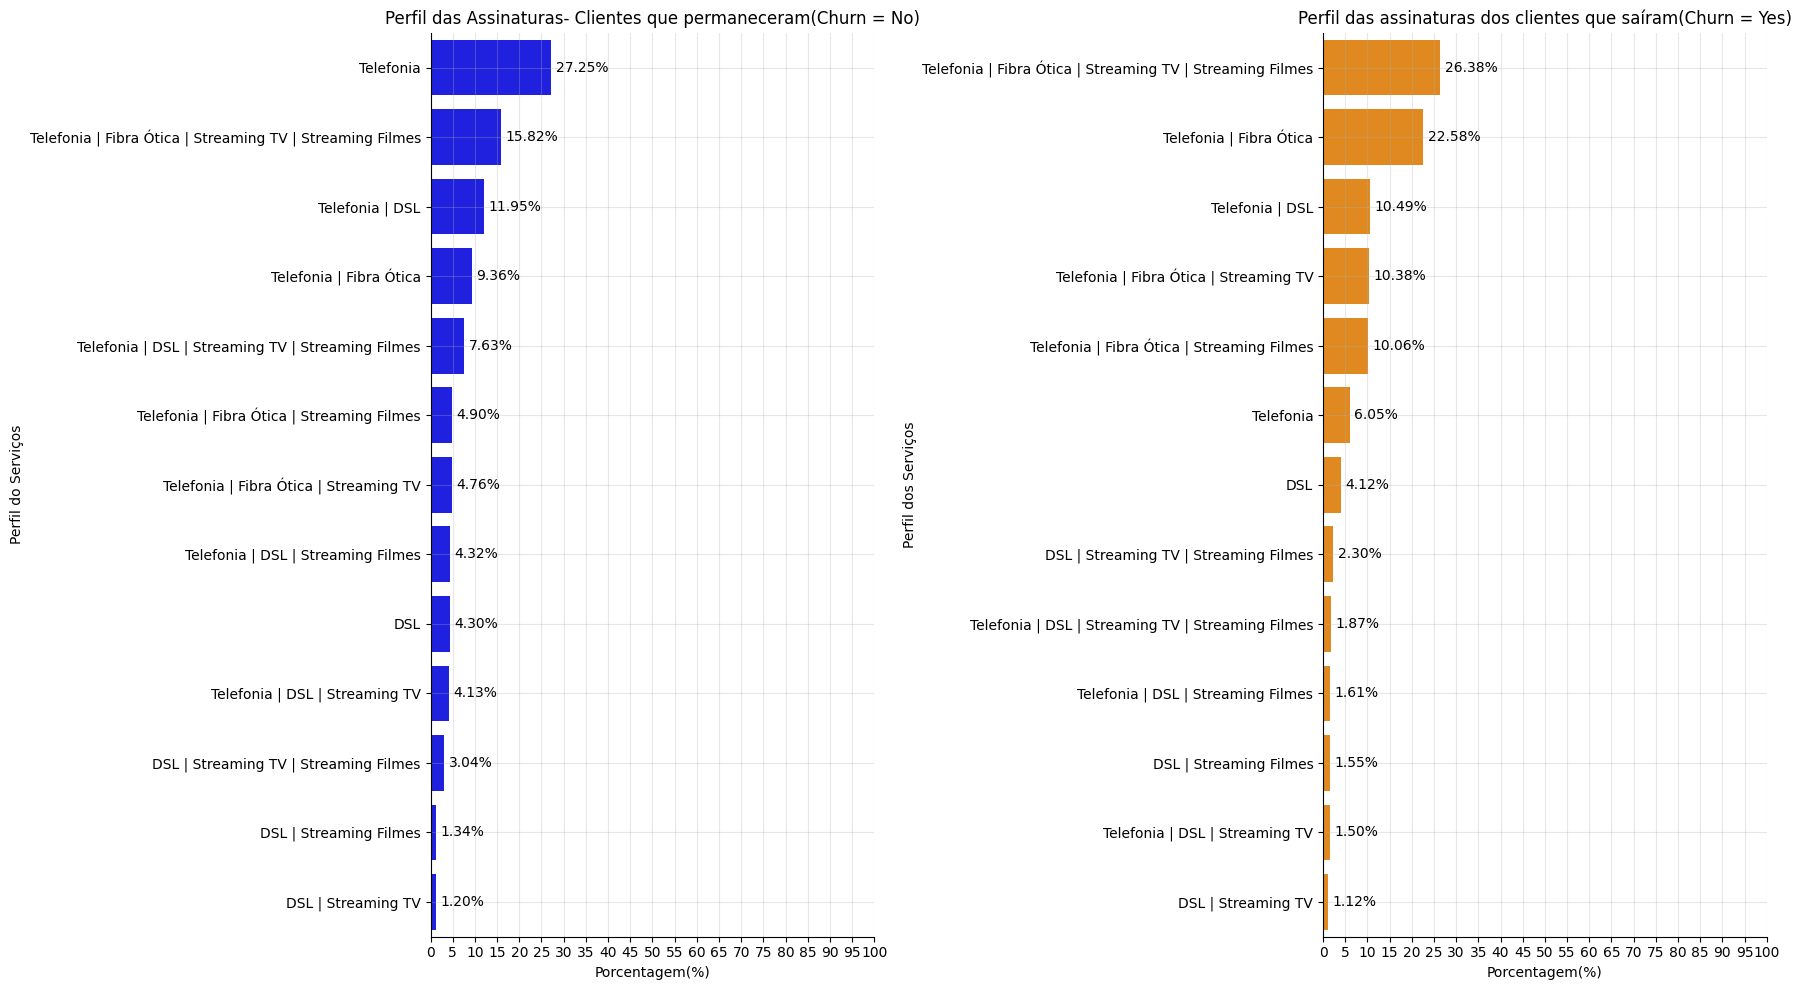

In [ ]:
def gerar_perfil(row):
    perfil = []

    if row["Servico_telefonico"] == "Yes":
        perfil.append("Telefonia")

    if row["Internet"] == "DSL":
        perfil.append("DSL")
    elif row["Internet"] == "Fiber optic":
        perfil.append("Fibra Ótica")

    if row["Streaming_TV"] == "Yes":
        perfil.append("Streaming TV")

    if row["Streaming_filmes"] == "Yes":
        perfil.append("Streaming Filmes")

    return " | ".join(perfil)

# Aplicar ao DataFrame
perfil_cliente["Perfil_servico"] = perfil_cliente.apply(gerar_perfil, axis=1)

#Separando em 2 grupos(Churn e no Churn)
perfil_no = perfil_cliente[perfil_cliente["Churn"] == "No"].copy()
perfil_yes = perfil_cliente[perfil_cliente["Churn"] == "Yes"].copy()


ordem_no = (perfil_no
         .groupby("Perfil_servico")["Porcentagem"]
         .sum()
         .sort_values(ascending = False)
         .index
         )

ordem_yes = (perfil_yes
             .groupby("Perfil_servico")["Porcentagem"]
             .sum()
             .sort_values(ascending = False)
             .index
             )

#plotagem do grafico
fig4, axs4 = plt.subplots(1,2,figsize = (18,10),sharex = False)
fig4.subplots_adjust(hspace = 1, wspace = 1)
sns.barplot(
    data = perfil_no[perfil_no["Perfil_servico"].isin(ordem_no)],
    y = "Perfil_servico",
    x = "Porcentagem",
    ax = axs4[0],
    color = "blue",
    order = ordem_no

)
axs4[0].set_title("Perfil das Assinaturas- Clientes que permaneceram(Churn = No)")
axs4[0].set_xlabel("Porcentagem(%)")
axs4[0].set_ylabel("Perfil do Serviços")
axs4[0].set_xlim(0,100)
axs4[0].xaxis.set_major_locator(MultipleLocator(5))
axs4[0].grid(alpha = 0.3)
axs4[0].spines["top"].set_visible(False)
axs4[0].spines["right"].set_visible(False)

sns.barplot(
    data = perfil_yes[perfil_yes["Perfil_servico"].isin(ordem_yes)],
    y = "Perfil_servico",
    x = "Porcentagem",
    ax= axs4[1],
    color = "darkorange",
    order = ordem_yes
)

axs4[1].set_title("Perfil das assinaturas dos clientes que saíram(Churn = Yes)")
axs4[1].set_xlabel("Porcentagem(%)")
axs4[1].set_ylabel("Perfil dos Serviços")
axs4[1].set_xlim(0,100)
axs4[1].xaxis.set_major_locator(MultipleLocator(5))
axs4[1].grid(alpha = 0.3)
axs4[1].spines["top"].set_visible(False)
axs4[1].spines["right"].set_visible(False)

#adicionando os valores na barra
for ax in axs4:
    for p in ax.patches:
    # Verifica se o patch tem get_width (é uma barra)
      if hasattr(p, 'get_width'):
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        if width > 0:
            ax.text(
                width + 1,
                y,
                f'{width:.2f}%',
                va='center'
            )


plt.tight_layout()
plt.show()


In [ ]:
telecomx["Perfil_servico"] = telecomx.apply(gerar_perfil,axis = 1)

medias_por_perfil = (
  telecomx.groupby(["Perfil_servico","Contrato", "Churn"])[["Valor_mensal", "Total_pago"]]
  .mean()
  .round(2)
  .reset_index()
)

display(medias_por_perfil.sort_values(by = "Total_pago", ascending = False))

,Perfil_servico,Contrato,Churn,Valor_mensal,Total_pago
73,Telefonia | Fibra Ótica | Streaming TV | Strea...,Two year,No,108.93,7149.71
74,Telefonia | Fibra Ótica | Streaming TV | Strea...,Two year,Yes,107.15,6864.77
61,Telefonia | Fibra Ótica | Streaming Filmes,Two year,No,98.08,6365.86
67,Telefonia | Fibra Ótica | Streaming TV,Two year,No,96.36,6229.85
71,Telefonia | Fibra Ótica | Streaming TV | Strea...,One year,No,104.00,5677.97
...,...,...,...,...,...
14,DSL | Streaming TV,One year,Yes,41.60,470.60
29,Telefonia | DSL,Month-to-month,Yes,49.93,366.93
1,DSL,Month-to-month,Yes,28.68,237.11
22,Telefonia,Month-to-month,No,20.46,209.94


In [ ]:
fig5 =px.scatter(
    data_frame = medias_por_perfil,
    title = "Medias de Valores gastos por perfil de Cliente e tempo de contrato",
    x = "Total_pago",
    y = "Valor_mensal",
    color = "Perfil_servico",
    symbol = "Contrato",
    facet_col = "Churn"



)

fig5.update_layout(

    title_font_size=20,
    xaxis_title="Total Pago (R$)",
    yaxis_title="Valor Mensal (R$)",
    legend_title="Perfil de Serviço",
    template="plotly_white"
)
fig5.show()

In [ ]:
tipo_fatura = telecomx.groupby("fatura_digital")["fatura_digital"].value_counts().rename("Quantidade").reset_index()
display(tipo_fatura)

,fatura_digital,Quantidade
0,No,2864
1,Yes,4168


In [ ]:
fatura_por_churn = telecomx.groupby("fatura_digital")["Churn"].value_counts().rename("Quantidade").reset_index()
display(fatura_por_churn)

,fatura_digital,Churn,Quantidade
0,No,No,2395
1,No,Yes,469
2,Yes,No,2768
3,Yes,Yes,1400


In [ ]:
tipo_pagamento = telecomx.groupby("Forma_pagamento")["Forma_pagamento"].value_counts().rename("Quantidade").reset_index()
display(tipo_pagamento)

,Forma_pagamento,Quantidade
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


In [ ]:
formato_pagamento_por_churn = telecomx.groupby(["Forma_pagamento", "Churn"])["Forma_pagamento"].value_counts().rename("Quantidade").reset_index()
display(formato_pagamento_por_churn)

,Forma_pagamento,Churn,Quantidade
0,Bank transfer (automatic),No,1284
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1289
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1296
7,Mailed check,Yes,308


/tmp/ipython-input-51-482809141.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




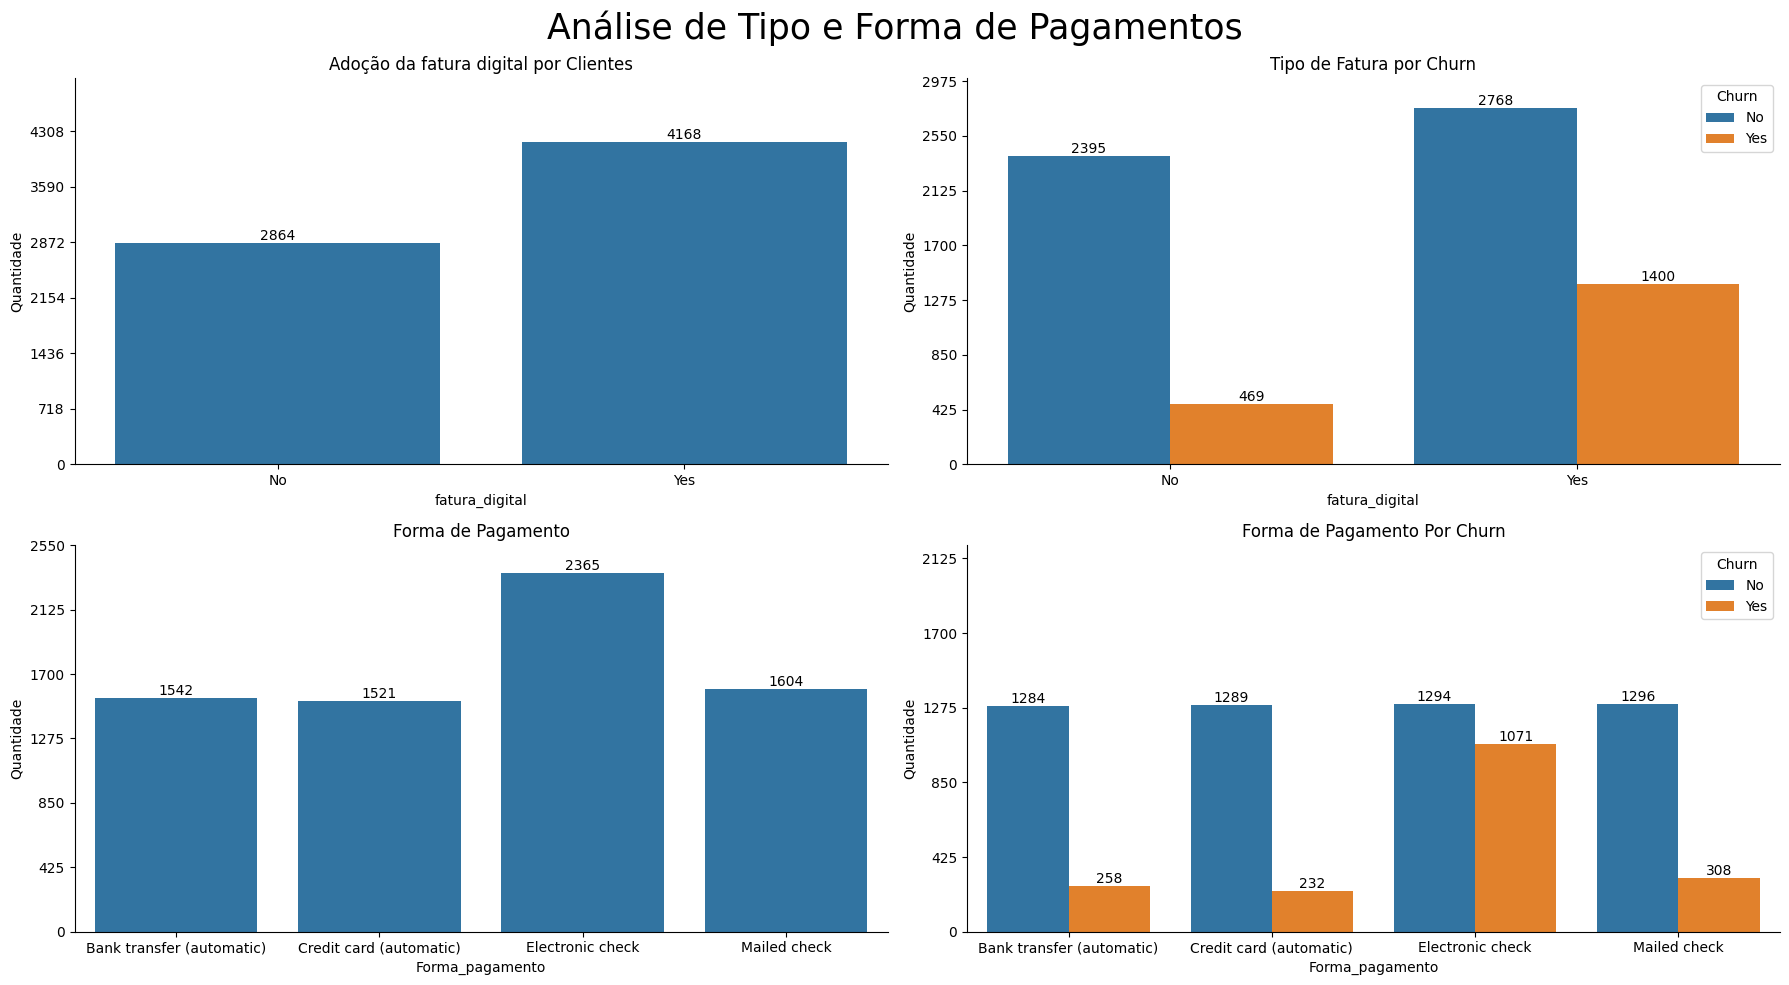

In [ ]:
fig6,axs6 = plt.subplots(2,2, figsize=(18,10))
fig6.subplots_adjust(hspace = 1, wspace = 1)
fig6.suptitle("Análise de Tipo e Forma de Pagamentos", fontsize = 25)

sns.barplot(data = tipo_fatura, x = "fatura_digital", y = "Quantidade", ax = axs6[0,0])
axs6[0,0].set_title("Adoção da fatura digital por Clientes")
axs6[0,0].set_ylim(0,5000)
axs6[0,0].yaxis.set_major_locator(MultipleLocator(718))
axs6[0,0].spines["top"].set_visible(False)
axs6[0,0].spines["right"].set_visible(False)

sns.barplot(data = fatura_por_churn, x = "fatura_digital",y = "Quantidade", hue = "Churn", ax = axs6[0,1])
axs6[0,1].set_title("Tipo de Fatura por Churn")
axs6[0,1].set_ylim(0,3000)
axs6[0,1].yaxis.set_major_locator(MultipleLocator(425))
axs6[0,1].spines["top"].set_visible(False)
axs6[0,1].spines["right"].set_visible(False)

sns.barplot(data =tipo_pagamento, x = "Forma_pagamento", y = "Quantidade",ci = None, ax = axs6[1,0])
axs6[1,0].set_title("Forma de Pagamento", )
axs6[1,0].set_ylim(0,2550)
axs6[1,0].yaxis.set_major_locator(MultipleLocator(425))
axs6[1,0].spines["top"].set_visible(False)
axs6[1,0].spines["right"].set_visible(False)

sns.barplot(data = formato_pagamento_por_churn, x = "Forma_pagamento", y = "Quantidade", hue = "Churn", ax = axs6[1,1])
axs6[1,1].set_title("Forma de Pagamento Por Churn")
axs6[1,1].set_ylim(0,2200)
axs6[1,1].yaxis.set_major_locator(MultipleLocator(425))
axs6[1,1].spines["top"].set_visible(False)
axs6[1,1].spines["right"].set_visible(False)

for row in axs6:
  for ax in row:
    for cont in ax.containers:
      try:
        if ax in axs6:
          ax.bar_label(cont, fmt="%.0f", label_type="edge")
      except exception:
        pass


plt.tight_layout()
plt.show()

## Modelagem pré-processamento machine learning

In [ ]:
#Salvando o arquivo pre tratado em formato csv
telecomx.to_csv("telecomx.csv", index = False)

#copiando o dados para outro DataFrame, para manter os dados segurados
dados_telecomx = telecomx.copy()
dados_telecomx.head(5)

,ID_cliente,Churn,Genero,Idoso,Possui_parceiro,Possui_dependentes,Meses_contrato,Servico_telefonico,Multiplas_linhas,Internet,...,suporte_tecnico_adcional,Streaming_TV,Streaming_filmes,Contrato,fatura_digital,Forma_pagamento,Gasto_diario,Valor_mensal,Total_pago,Perfil_servico
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30,Telefonia | DSL | Streaming TV
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40,Telefonia | DSL | Streaming Filmes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85,Telefonia | Fibra Ótica
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85,Telefonia | Fibra Ótica | Streaming TV | Strea...
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40,Telefonia | Fibra Ótica | Streaming TV


In [ ]:
colunas_binarias = [
    "Churn",
    "Possui_parceiro",
    "Possui_dependentes",
    "Servico_telefonico",
    "fatura_digital"
]

mapeamento_binarios = {"Yes": 1, "No": 0}

for col in colunas_binarias:
  print(f"{col}:{dados_telecomx[col].unique()}")

for col in colunas_binarias:
  dados_telecomx[col] = dados_telecomx[col].map(mapeamento_binarios)

dados_telecomx.head()

Churn:['No' 'Yes']
Possui_parceiro:['Yes' 'No']
Possui_dependentes:['Yes' 'No']
Servico_telefonico:['Yes' 'No']
fatura_digital:['Yes' 'No']


,ID_cliente,Churn,Genero,Idoso,Possui_parceiro,Possui_dependentes,Meses_contrato,Servico_telefonico,Multiplas_linhas,Internet,...,suporte_tecnico_adcional,Streaming_TV,Streaming_filmes,Contrato,fatura_digital,Forma_pagamento,Gasto_diario,Valor_mensal,Total_pago,Perfil_servico
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,2.20,65.6,593.30,Telefonia | DSL | Streaming TV
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,2.01,59.9,542.40,Telefonia | DSL | Streaming Filmes
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,2.34,73.9,280.85,Telefonia | Fibra Ótica
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,3.17,98.0,1237.85,Telefonia | Fibra Ótica | Streaming TV | Strea...
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,2.97,83.9,267.40,Telefonia | Fibra Ótica | Streaming TV


In [ ]:
dados_telecomx["Assina_internet"] = dados_telecomx["Internet"].map(lambda x: 0 if x == "No" else 1)

dados_telecomx.insert(10, "Assina_internet", dados_telecomx.pop("Assina_internet"))

In [ ]:
dados_telecomx["Servico_telefonico"].unique()

array([1, 0])

In [ ]:
# Colunas de serviços
servicos = [
    "Servico_telefonico", "Streaming_TV", "Streaming_filmes", "Assina_internet",
    "backup_online", "Seguranca_online", "Protecao_dispositivo", "suporte_tecnico_adcional"
]

# Mapeamento para transformar Yes/No/etc em 1/0
mapeamento_binario = {"Yes": 1, "No": 0, "No internet service": 0, "No phone service": 0}

# Só aplica o map se a coluna ainda for do tipo "object" (texto)
for col in servicos:
    if dados_telecomx[col].dtype == "object":
        dados_telecomx[col] = dados_telecomx[col].map(mapeamento_binario)

# Agora pode somar com segurança
dados_telecomx["Qtd_servicos"] = dados_telecomx[servicos].sum(axis=1).astype(int)



In [ ]:
dados_telecomx["Todos_servicos"] = (dados_telecomx["Qtd_servicos"] == len(servicos)).astype(int)

In [ ]:
dados_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_cliente                7032 non-null   object 
 1   Churn                     7032 non-null   int64  
 2   Genero                    7032 non-null   object 
 3   Idoso                     7032 non-null   int64  
 4   Possui_parceiro           7032 non-null   int64  
 5   Possui_dependentes        7032 non-null   int64  
 6   Meses_contrato            7032 non-null   int64  
 7   Servico_telefonico        7032 non-null   int64  
 8   Multiplas_linhas          7032 non-null   object 
 9   Internet                  7032 non-null   object 
 10  Assina_internet           7032 non-null   int64  
 11  Seguranca_online          7032 non-null   int64  
 12  backup_online             7032 non-null   int64  
 13  Protecao_dispositivo      7032 non-null   int64  
 14  suporte_tecni

In [ ]:
evasao_pg = dados_telecomx.groupby(["Forma_pagamento", "Contrato"])["Churn"].value_counts().rename("Quantidade").reset_index()
display(evasao_pg)

,Forma_pagamento,Contrato,Churn,Quantidade
0,Bank transfer (automatic),Month-to-month,0,388
1,Bank transfer (automatic),Month-to-month,1,201
2,Bank transfer (automatic),One year,0,353
3,Bank transfer (automatic),One year,1,38
4,Bank transfer (automatic),Two year,0,543
5,Bank transfer (automatic),Two year,1,19
6,Credit card (automatic),Month-to-month,0,365
7,Credit card (automatic),Month-to-month,1,178
8,Credit card (automatic),One year,0,357
9,Credit card (automatic),One year,1,41


In [ ]:
# Calculando percentual de churn (considerando churn = 1) por Forma_pagamento + Contrato
tabela_churn = (
    dados_telecomx
    .groupby(["Forma_pagamento", "Contrato"])["Churn"]
    .mean()  # média de churn = taxa de churn
    .mul(100)
    .round(2)
    .unstack()  # Coloca "Contrato" nas colunas
)


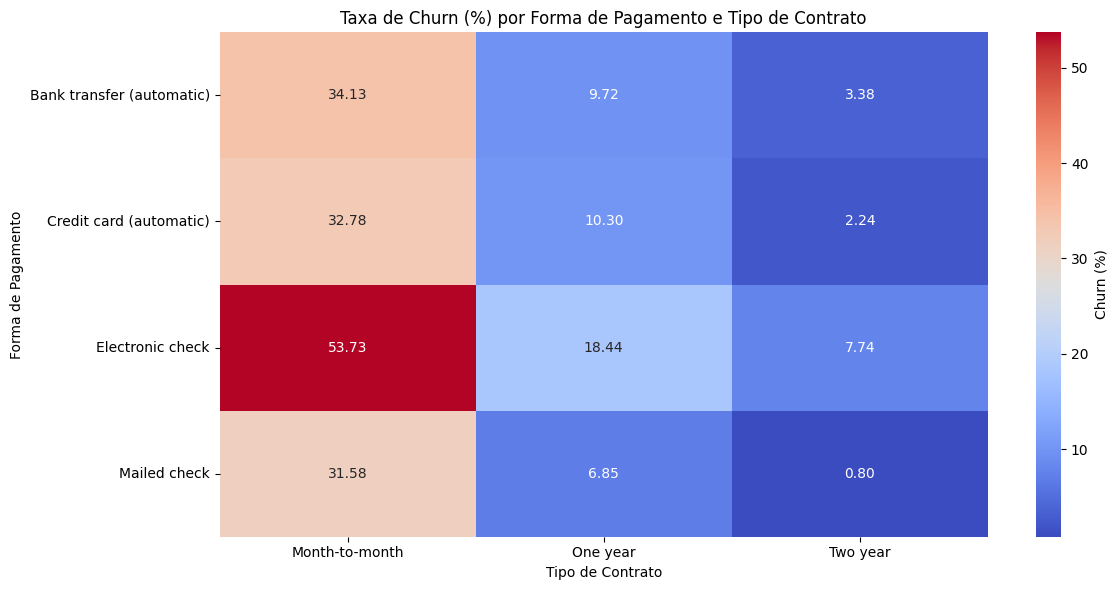

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(tabela_churn, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Churn (%)'})

plt.title("Taxa de Churn (%) por Forma de Pagamento e Tipo de Contrato")
plt.ylabel("Forma de Pagamento")
plt.xlabel("Tipo de Contrato")
plt.tight_layout()
plt.show()

In [ ]:
qntd_servicos_por_churn = (dados_telecomx.groupby(
    ["Qtd_servicos", "Churn"])
    .size()
    .reset_index(name = "Quantidade")
)

print(qntd_servicos_por_churn)

    Qtd_servicos  Churn  Quantidade
0              1      0        1452
1              1      1         148
2              2      0         352
3              2      1         375
4              3      0         563
5              3      1         433
6              4      0         680
7              4      1         361
8              5      0         771
9              5      1         289
10             6      0         643
11             6      1         182
12             7      0         458
13             7      1          66
14             8      0         244
15             8      1          15


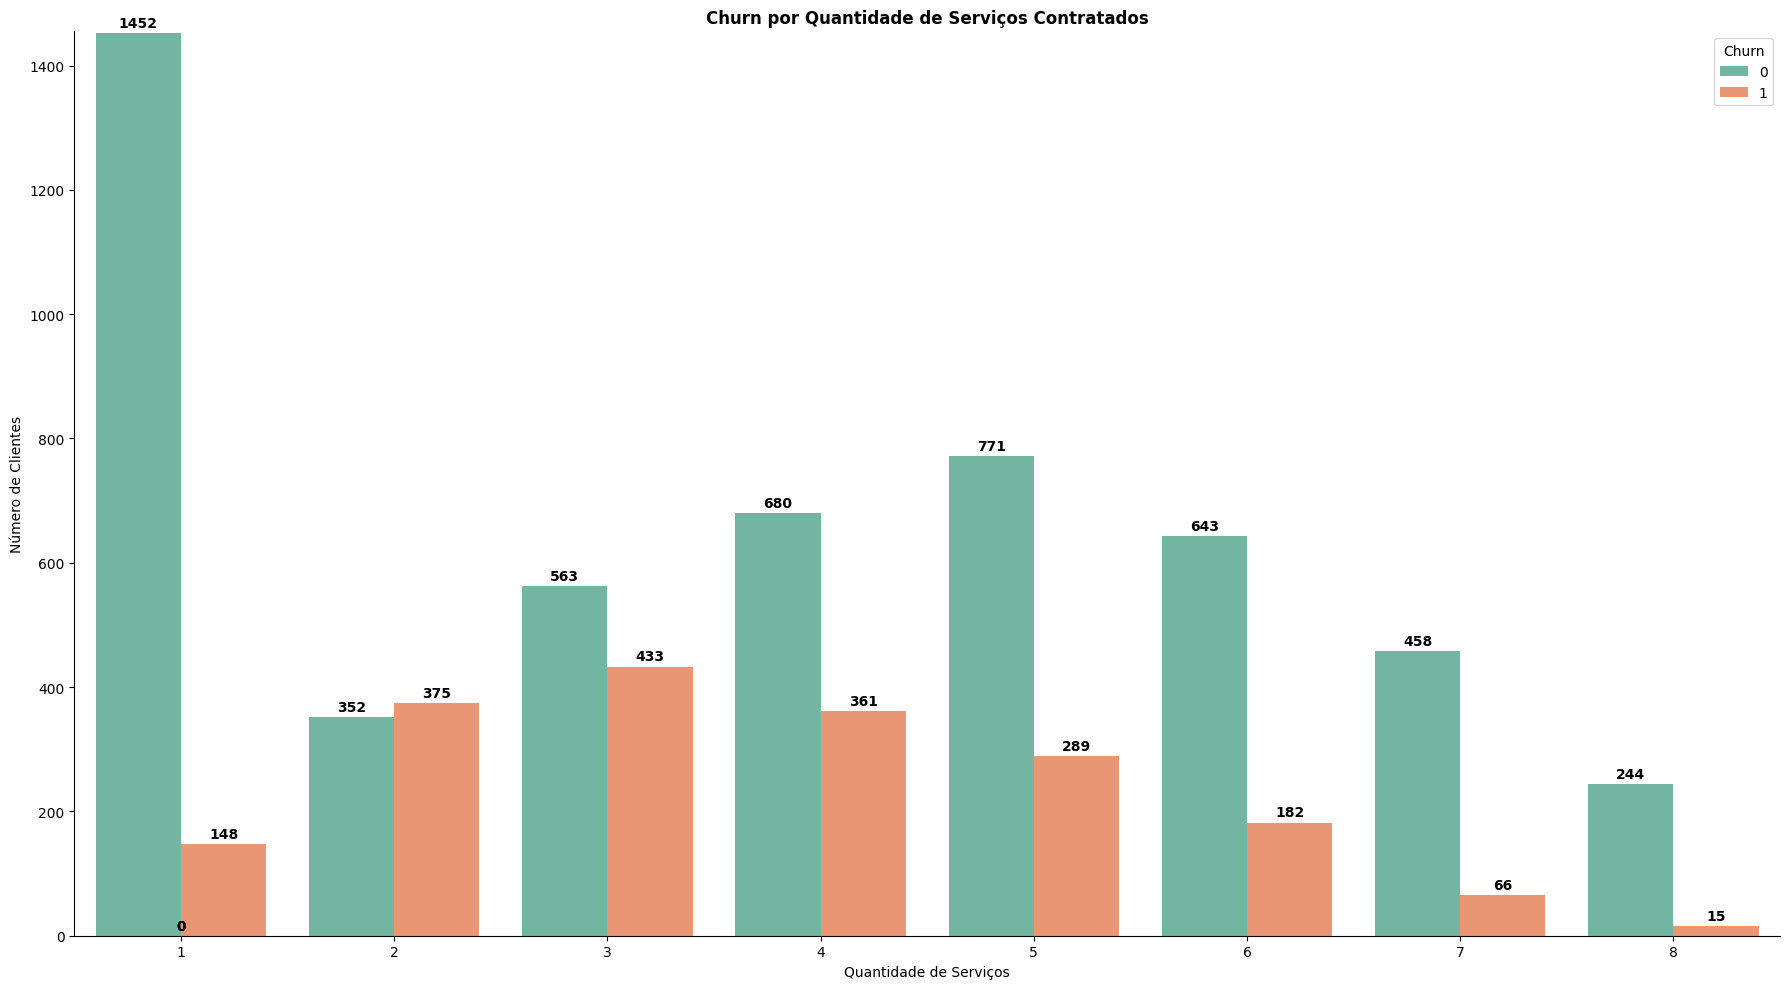

In [ ]:
# Plotando
plt.figure(figsize=(18, 10))
ax = sns.barplot(data=qntd_servicos_por_churn, x="Qtd_servicos", y="Quantidade", hue="Churn", palette="Set2")

plt.title("Churn por Quantidade de Serviços Contratados", fontweight = "bold")
plt.xlabel("Quantidade de Serviços")
plt.ylabel("Número de Clientes")
plt.gca().set_ylim(top = 1455)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

for p in ax.patches:
    altura = p.get_height()
    if not np.isnan(altura):  # segurança pra não escrever em barra nula
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=altura + 5,  # um pouco acima da barra
            s=int(altura),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

plt.tight_layout()

plt.show()

##📝 **Relatorio Final**

Este relatório foi elaborado a partir de uma solicitação da equipe de Machine Learning, com o objetivo de realizar o tratamento dos dados e conduzir uma análise exploratória da taxa de churn observada na base de clientes da Telecomx. A avaliação inicial indicou uma taxa de churn de 26,6%, sem variações relevantes entre os gêneros — sendo 49,5% da base composta por clientes do sexo feminino e 50,5% por clientes do sexo masculino.
Observou-se que 83,8% dos clientes possuem menos de 65 anos, enquanto os 16,2% restantes pertencem à faixa etária acima desse limite. Em relação à composição familiar, verificou-se que 70,2% dos clientes não possuem dependentes, ao passo que 29,8% possuem ao menos um dependente registrado.



Os dados analisados demonstram que não há diferenças significativas entre os gêneros quanto à taxa de evasão. Além disso, embora a maioria dos clientes não tenha dependentes, a proporção de churn entre os grupos é semelhante, não sendo possível atribuir à composição familiar um papel determinante na evasão.
Por outro lado, um ponto de atenção recai sobre o grupo de clientes idosos. Apesar de representarem apenas 16,2% da base — totalizando pouco mais de 1.800 pessoas —, esse segmento apresenta uma taxa de churn de 25,5%, o que corresponde a mais do que o dobro da taxa observada entre os clientes não seniores, cuja evasão é de 12,9%. Esse dado sugere a necessidade de estratégias específicas voltadas para a retenção de clientes na faixa etária acima de 65 anos.


É de vital importância ressaltar que os dados demonstram que a maioria dos contratos de prestação de serviço possui caráter de curto prazo — principalmente contratos mensais — representando mais de 50% da base analisada. Observa-se, ainda, que os contratos de menor duração estão associados às maiores taxas de churn, indicando uma relação direta entre a temporalidade contratual e a propensão à evasão.

Na base de dados da Telecomx, aproximadamente 90,33% dos clientes utilizaram os serviços de telefonia em algum momento. Dentre esses, 66,17% ainda permanecem ativos, enquanto 24,16% já se evadiram. Há também um grupo de 7,25% que não utilizam atualmente o serviço de telefonia, mas continuam ativos na base, e outros 2,42% que nunca utilizaram esse serviço e já se evadiram.
Considerando apenas os clientes ativos, observa-se que 9,88% não fazem uso do serviço de telefonia, mas permanecem na base como usuários de outros serviços. Em números absolutos, 5.163 clientes ativos utilizam os serviços de telefonia, enquanto outros 510 clientes ativos utilizam exclusivamente os demais serviços da empresa.


No segmento de internet, a Telecomx oferece dois tipos de conexão: DSL e fibra óptica. A distribuição da base de clientes é composta por 34,36% com conexão DSL, 44,02% com fibra óptica e cerca de 21,62% que não utilizam nenhum dos serviços de conexão com a internet.
Considerando apenas os clientes ativos, 37,90% utilizam conexão DSL, 34,84% utilizam fibra óptica e 27,26% ainda não possuem serviços de internet contratados com a empresa.
Entre os clientes que se evadiram, 69,40% faziam uso da conexão por fibra óptica, enquanto 24,56% utilizavam DSL. Os dados indicam uma taxa de churn expressiva entre os assinantes do serviço de internet, especialmente entre aqueles que utilizavam fibra óptica: 41,89% desses clientes se evadiram, em comparação a 19% dos usuários de DSL e 7,43% dos que não utilizavam o serviço.
Atualmente, não há dados suficientes na base para identificar os motivos que levam à elevada taxa de evasão dos serviços de internet, tampouco explicar por que a conexão por fibra óptica concentra os maiores índices de churn. Este insight é relevante e reforça a necessidade de investigações adicionais junto aos assinantes desses serviços, a fim de identificar causas específicas e subsidiar ações de melhoria no atendimento e na qualidade oferecida.


A análise dos perfis de clientes permite observar o comportamento dos usuários de acordo com os serviços contratados. Os clientes que contratam exclusivamente o serviço de telefonia são os que apresentam o menor valor médio mensal pago — aproximadamente R$ 21,00 reais. Em seguida,  estão os clientes que contratam apenas o serviço de internet via conexão DSL, com um valor médio mensal de R$ 32,00. Na outra extremidade, os clientes que assinam o pacote completo — composto por telefonia, internet via fibra óptica, streaming de TV e filmes — são os que pagam os valores mais altos, com média mensal de R$ 103,00.
No que se refere à fidelidade contratual, os clientes que assinam somente internet com fibra óptica junto à telefonia permanecem, em média, 21 meses com esse plano, sendo acompanhados de perto pelos usuários de internet via DSL, com permanência média de 22 meses. No entanto, os dados disponíveis não permitem determinar com precisão os motivos que justificam esse período de permanência — se são decorrentes de evasão, troca de plano, ou outros fatores.
Entre os perfis que mais contribuíram para a evasão, destacam-se os assinantes do pacote completo (telefonia, fibra óptica, streaming de TV e filmes), representando 26,38% de todos os clientes que se evadiram da Telecomx. Em seguida, os clientes que contratam telefonia e fibra óptica, com 22,58%. Outros perfis incluem: telefonia + DSL (10,49%), telefonia + fibra óptica + streaming de TV (10,38%) e telefonia + fibra óptica + streaming de filmes (10,06%).
Já entre os clientes ativos, os cinco principais perfis de serviços contratados são:
- Telefonia: 27,25%
- Telefonia + fibra óptica + streaming de TV e filmes: 15,82%
- Telefonia + DSL: 11,95%
- Telefonia + fibra óptica: 9,36%
- Telefonia + DSL + streaming de TV e filmes: 7,36%
Esses dados reforçam a importância de aprofundar o estudo sobre os serviços de conexão à internet — especialmente a conexão via fibra óptica — sem se limitar a essa tecnologia. A compreensão dos pontos críticos poderá subsidiar melhorias nos serviços oferecidos, contribuindo tanto para a retenção quanto para a atração de novos clientes.


 Ao analisar a base de dados com foco nas formas e tipos de pagamento, observamos que a maioria dos clientes (59,27%) optou por receber a fatura digital. Entre esse grupo, aproximadamente 1.400 clientes se evadiram, correspondendo a cerca de 33,58% — um índice elevado que pode indicar possíveis fragilidades relacionadas a essa modalidade de faturamento. Por outro lado, os clientes que optaram por receber fatura física (2.864 clientes, ou 40,73% da base) apresentaram uma taxa de churn de 16,37%, significativamente inferior.
Em relação à forma de pagamento, o método mais popular entre os clientes é o "electronic check", com 2.365 clientes (33,63%). Em seguida, temos:
- Mailed check: 1.604 clientes (22,81%)
- Bank transfer (automático): 1.542 clientes (21,92%)
- Credit card (automático): 1.521 clientes (21,62%)           



A taxa de evasão é relativamente baixa entre os clientes que utilizam bank transfer e credit card (aproximadamente 16%). Ela aumenta entre os usuários de mailed check, chegando a 19,20%. No entanto, o maior índice de churn ocorre entre os usuários de electronic check, com aproximadamente 45,28%, indicando um possível problema com esse meio de pagamento. A base atual não dispõe de informações suficientes para esclarecer os motivos dessa tendência, sugerindo necessidade de investigação mais aprofundada.
Outro ponto relevante diz respeito à associação entre forma de pagamento e duração do contrato. Independentemente do método de pagamento, contratos mensais apresentam as maiores taxas de evasão. Exemplos:
- Electronic check: 53,73% de churn para contratos mensais, 18,44% para anuais, e apenas 7,74% para bianuais.
- Mailed check: 31,58% de churn nos contratos mensais, 6,85% nos anuais e somente 0,80% nos bianuais.
Esses dados evidenciam que contratos de maior duração estão correlacionados a maior fidelização, independentemente da forma de pagamento escolhida


Por fim, a Telecomx oferece oito tipos de serviços distintos, e os dados demonstram que o número de serviços contratados impacta diretamente na taxa de evasão:
- 1 serviço contratado: churn de 9,25%
- 2 serviços contratados: churn de 51,58%
- 5 serviços contratados: churn de 27,26%
- 8 serviços contratados: churn de apenas 5,79%


Por fim, a Telecomx oferece oito tipos de serviços distintos, e os dados demonstram que o número de serviços contratados impacta diretamente na taxa de evasão:
- 1 serviço contratado: churn de 9,25%
- 2 serviços contratados: churn de 51,58%
- 5 serviços contratados: churn de 27,26%
- 8 serviços contratados: churn de apenas 5,79%


Recomendações Estratégicas








1.   Investigar causas do alto churn entre clientes de internet fibra óptica

*   A taxa de evasão entre usuários de fibra óptica é significativamente alta(41,89%), especialmente entre clientes que também contratam pacotes mais robusto.

*   Recomenda- se aplicar pesquisas de satisfação, entrevistas com ex-clientes e análise de chamados técnicos para entender possíveis gasgalos relacionados à qualidade, atendimento e usabilidade do serviço.


2.  Revisar o modelo de faturamento digital.

*  Clientes que otptam pela fatura digital apresentam churn duas vezes maior (33,58%) que os usuários de fatura física(16,37%).

*   Sugestões:

    ▶ Garantir entrega e legibilidade dos boletos digitais.

    ▶ Verificar problemas com e-mails,apps e notificações.

    ▶Testar envios multicanal(WhatsApp,SMS,aplicativo.

3.  Atenção ao perfil de cliente idoso.

*   Apesar de representarem  apenas 16,2% da base, clientes acima de 65 anos apresentam churn elevado(25,5%).

*   Ações possíveis:

    ▶ Personalizar pacotes com atendimento simplificado.

    ▶ Criar campanhas de retenção direcionadas.

    ▶ Avaliar suporte técnico e digital para esse público.

4. Incentivar planos de longa duração

*   Os contratos mensais concentram a maior parte da evasão, independentemente da forma de pagamento.

*   Sugestões:

    ▶ Criar benefícios exclusivos para planos anuais ou bianuais.

    ▶ Oferecer descontos progressivos ou vantagens cumulativas.

    ▶ Comunicar com clareza os diferenciais dos planos mais longos.

5.  Reavaliar o método de pagamento "electronic check"

*   Apesar de ser o método mais popular(33,63%), apresenta a maior taxa de churn(45,28%)

*   Sem dados suficientes para entender as causas, recomenda-se:

    ▶ Realizar mapeamentos de problemas técnicos com esse sistema.

    ▶ Comparar taxas de atraso e cancelamento.

    ▶ Considerar incentivos para migração para métodos automáticos.

6.  Promover estratégias de cross-selling de serviços

*   Clientes com múltiplos serviços têm taxas de churn significativamente menores:

    ▶ 2 serviços:51,58% churn.

    ▶ 8 serviços:apenas 5,79% churn.

*   Ações recomendadas:

    ▶ Oferecer pacotes personalizados conforme perfil de uso.

    ▶ Usar inteligência de dados para indicar serviços complementares.

    ▶ Implementar campanhas de upgrade e fidelização.

7.  Monitorar perfis com maior evasão entre pacotes combinados

*   Os pacotes que combinam telefonia, fibra óptica e streaming concentram os maiores índices churn.

*   Estratégias possíveis:

    ▶ Reavalir a experiência de uso dos serviços integrados.

    ▶ Testar diferentes combinações de preços e benefícios.

    ▶ Acompanhar o NPS(Net Promter Score) por perfil de serviço.

8.  Estudar viabilidade de planos familiares

*   Com 70,2% dos clientes não possuindo dependentes, há espaço para testar planos familiares que incentivem vinculação de múltiplos usuários numa mesma conta.

*   Sugestões:

    ▶ Criar planos compartilhados com preços atrativos.

    ▶ Testar a adesão em campanhas pilotos regionais.

    ▶Estimular o vínculo familiar como forma de retenção.















